In [1]:
!pip3 install pymc3==3.9.3
!pip3 install arviz==0.11.0
!pip3 install pymc
!pip3 install statsmodels

     |████████████████████████████████| 1.9MB 4.9MB/s 
     |████████████████████████████████| 1.6MB 24.5MB/s 
     |████████████████████████████████| 4.7MB 37.2MB/s 
     |████████████████████████████████| 768kB 37.3MB/s 
     |████████████████████████████████| 317kB 40.6MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 1.6MB 6.9MB/s 
  Found existing installation: arviz 0.11.2
    Uninstalling arviz-0.11.2:
      Successfully uninstalled arviz-0.11.2
     |████████████████████████████████| 389kB 6.1MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp37-cp37m-linux_x86_64.whl size=1352859 sha256=5870b1f8c02b032f4717e141c189e188521af41aabda832ee032090057f189b6
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b0

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import arviz as az
from statsmodels.tsa import stattools
import statsmodels.api as sm
import pymc3 as pm
import pymc

import os
import sys
from plot_lib import set_default

set_default(figsize=(6, 4))

### Mixture of two Normals

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


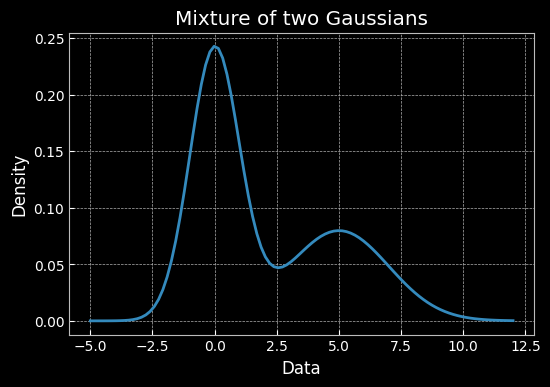

In [9]:
from scipy.stats import norm

# Values to sample
x = np.linspace(-5, 12.0, num = 100)
# Normal 1 distribution
mu_1 = 0
std_1 = 1
r_n1 = norm.pdf(loc = mu_1, scale = std_1, x = x)
# Normal 2 Distribution
mu_2 = 5
std_2 = 2
r_n2 = norm.pdf(loc = mu_2, scale = std_2, x = x)

### computing mixture model
mixture_model = (0.6 * r_n1) + (0.4 * r_n2)

# Plotting the mixture models
fig, ax = plt.subplots(1, 1)
sns.lineplot(x, mixture_model)
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Mixture of two Gaussians')
plt.show()

### Skewed

A skewed distributions, are distributions where one tail seems
to tamper out more slowly than the other tail. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


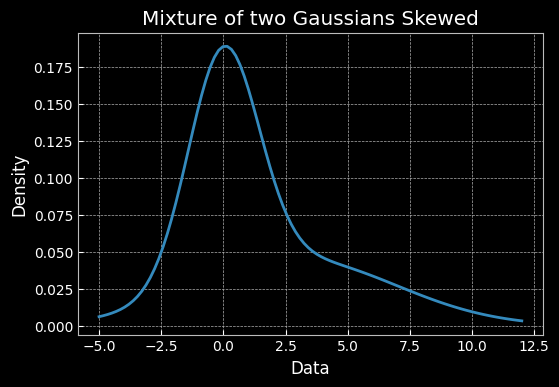

In [11]:
# Values to sample
x = np.linspace(-5, 12.0, num = 100)
# Normal 1 distribution
mu_1 = 0
var_1 = 2
r_n1 = norm.pdf(loc = mu_1, scale = np.sqrt(var_1), x = x)
# Normal 2 Distribution
mu_2 = 3
var_2 = 16
r_n2 = norm.pdf(loc = mu_2, scale = np.sqrt(var_2), x = x)

### computing mixture model
mixture_model = (0.55 * r_n1) + (0.45 * r_n2)

# Plotting the mixture models
fig, ax = plt.subplots(1, 1)
sns.lineplot(x, mixture_model)
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Mixture of two Gaussians Skewed')
plt.show()

### Heavy tailed

Symmetric and heavy tailed mixture of Gaussians

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


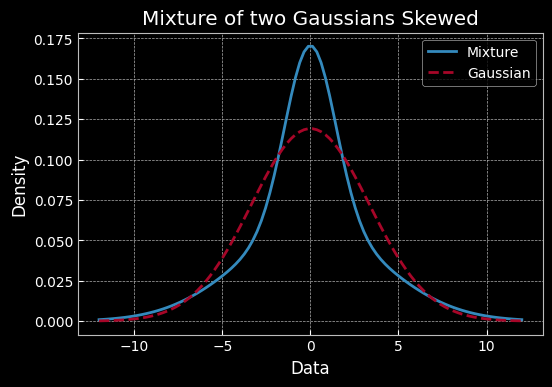

In [15]:
# Values to sample
x = np.linspace(-12.0, 12.0, num = 100)
# Normal 1 distribution
mu_1 = 0
var_1 = 2
r_n1 = norm.pdf(loc = mu_1, scale = np.sqrt(var_1), x = x)
# Normal 2 Distribution
mu_2 = 0
var_2 = 16
r_n2 = norm.pdf(loc = mu_2, scale = np.sqrt(var_2), x = x)
# Normal 3 Distribution
mu_3 = 0
var_3 = 20
r_n3 = norm.pdf(loc = mu_3, scale = np.sqrt(var_3), x = x)

### computing mixture model
y = (0.4 * r_n1) + (0.4 * r_n2) + (0.2 * r_n3)
z = norm.pdf(loc = 0, scale = np.sqrt(0.4 * 2 + 0.4 * 16 + 0.2 * 20), x = x)

# Plotting the mixture models
fig, ax = plt.subplots(1, 1)
sns.lineplot(x, y)
ax.plot(x, z, '--')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Mixture of gaussians heavy tailed')
plt.legend(['Mixture', 'Gaussian'])
plt.show()

### Zero-inflated mixtures (Discrete)

Zero-inflated negative binomial distribution

Zero-inflated counts may arise for example, in the study of biological data. When you look at your data, you may see that and you have large number of counts that are reported as zeros,
and that may not be very well-explained by any standard probability model such as the negative binomial or the Poisson model. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


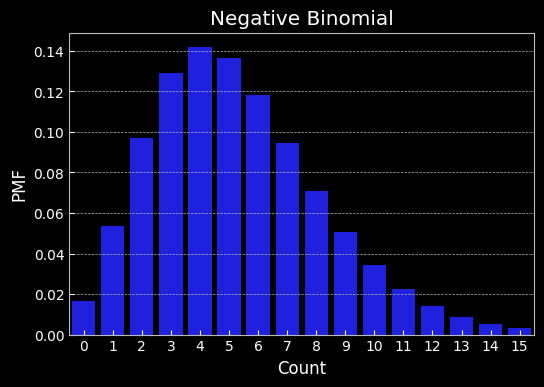

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


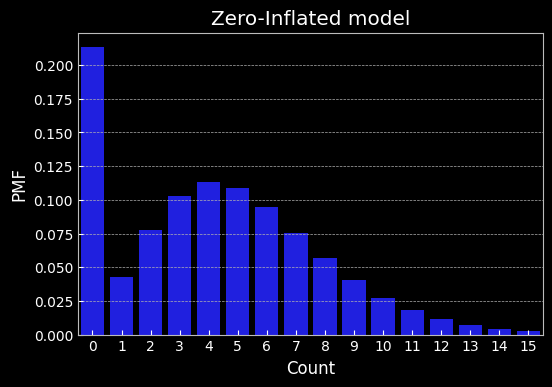

In [26]:
from scipy.stats import nbinom

# Values to sample
x = np.arange(0, 16)
y = nbinom.pmf(x, n = 8, p = 0.6)

# Plotting the negative binomial model
fig, ax = plt.subplots(1, 1)
sns.barplot(x, y, color = 'blue')
plt.title('Negative Binomial')
plt.xlabel('Count')
plt.ylabel('PMF')
plt.show()

# Point mass vector
p_mass = np.zeros(len(x))
p_mass[0] = 1
z = 0.2 * p_mass + (1 - 0.2) * y

# Plotting the zero-inflated model
fig, ax = plt.subplots(1, 1)
sns.barplot(x, z, color = 'blue')
plt.title('Zero-Inflated model')
plt.xlabel('Count')
plt.ylabel('PMF')
plt.show()

### Zero-inflated log Gaussian distribution

A second example of mixture distribution that is useful for dealing with zero-inflated data is the case where you want to mix a point mass with a continuous distribution. This often happens when you study time two events. Sometimes the time two events are zero. Imagine that you are studying the lifetime of,
for example a light bulb that you buy in the supermarket. For most light bulbs, that's going to be a very long time, but some of them come defective from the factory and they never work. So for those items, their lifetime is zero. So you want to be able to combine continuous distribution for example, a log-normal distribution, a Weibull distribution, and exponential distribution with discrete point mass at zero that captures those components that are defective from the manufacturer. 

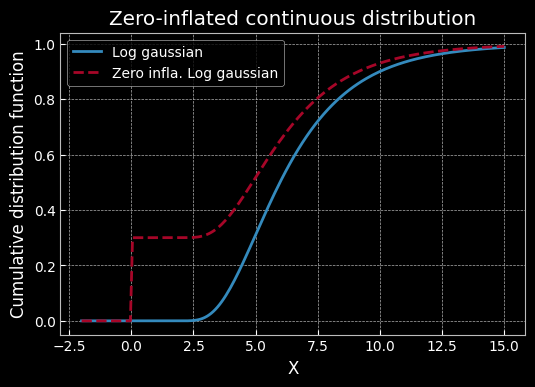

In [59]:
from scipy.stats import lognorm

# Zero-inflated continuous distribution
# Values to sample
x = np.linspace(-2.0, 15.0, num = 200)
# See for parameterization
y = lognorm.cdf(loc = 1.5, scale = np.exp(1.5), s = 0.5, x = x)

# Point mass vector
p_mass = np.zeros(len(x))
p_mass[x >= 0] = 1
z = 0.3 * p_mass + (1 - 0.3) * y

# Plotting the mixture models
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)
ax.plot(x, z, '--')
plt.xlabel('X')
plt.ylabel('Cumulative distribution function')
plt.title('Zero-inflated continuous distribution')
plt.legend(['Log gaussian', 'Zero infla. Log gaussian'])
plt.show()